In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:32<00:00, 41.9MB/s]
100% 1.06G/1.06G [00:32<00:00, 35.4MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [30]:
# importing all libraries
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from keras import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [9]:
# generator
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [19]:
from keras.backend import flatten
# CNN

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [21]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
history = model.fit(train_ds, epochs = 10,validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 119ms/step - loss: 1.3253 - accuracy: 0.6002 - val_loss: 0.6005 - val_accuracy: 0.6980
Epoch 2/10
625/625 [==============================] - 74s 118ms/step - loss: 0.5507 - accuracy: 0.7217 - val_loss: 0.5061 - val_accuracy: 0.7662
Epoch 3/10
625/625 [==============================] - 73s 117ms/step - loss: 0.4681 - accuracy: 0.7821 - val_loss: 0.4693 - val_accuracy: 0.7788
Epoch 4/10
625/625 [==============================] - 74s 117ms/step - loss: 0.4063 - accuracy: 0.8196 - val_loss: 0.5029 - val_accuracy: 0.7602
Epoch 5/10
625/625 [==============================] - 73s 116ms/step - loss: 0.3468 - accuracy: 0.8472 - val_loss: 0.4083 - val_accuracy: 0.8096
Epoch 6/10
625/625 [==============================] - 74s 117ms/step - loss: 0.2664 - accuracy: 0.8881 - val_loss: 0.9433 - val_accuracy: 0.6972
Epoch 7/10
625/625 [==============================] - 73s 116ms/step - loss: 0.2061 - accuracy: 0.9179 - val_loss: 0.7953 - val_ac

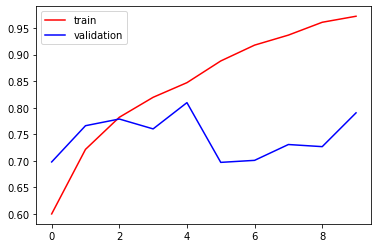

In [28]:
plt.plot(history.history['accuracy'],color = 'red',label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

In [31]:
test_img = cv2.imread('/content/drive/MyDrive/dog.jpeg')

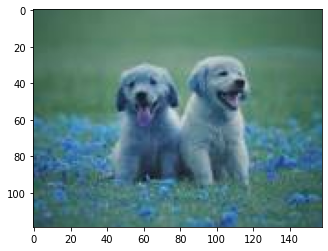

In [33]:
plt.imshow(test_img)

In [34]:
test_img = cv2.resize(test_img,(256,256))

In [35]:
test_input = test_img.reshape((1,256,256,3))

In [36]:
model.predict(test_input)

1/1 [==============================] - 0s 360ms/step


array([[1.]], dtype=float32)